In [1]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [2]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [3]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [4]:
model.wv

In [5]:
import gensim.downloader

models = gensim.downloader.info()['models']

In [6]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')


In [7]:
model.wv.most_similar('trees', topn=10)

[('survey', 0.1991206258535385),
 ('human', 0.17272792756557465),
 ('minors', 0.17018885910511017),
 ('time', 0.145950585603714),
 ('eps', 0.06408977508544922),
 ('response', -0.002765784738585353),
 ('user', -0.013535077683627605),
 ('graph', -0.023671654984354973),
 ('computer', -0.032843153923749924),
 ('system', -0.05234673619270325)]

In [8]:
model.wv.similarity('trees', 'graph')

-0.02367166

In [9]:
model.wv.doesnt_match(['minors', 'human', 'interface'])

'minors'

In [10]:
model.wv.distance('trees', 'graph')

1.0236716605722904

In [11]:
import nltk
import string
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

nltk.download('reuters')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower()) 
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]  
    return tokens

sentences = [preprocess(reuters.raw(fileid)) for fileid in reuters.fileids()]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

model.save("word2vec_reuters.model")
    

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
word1, word2 = "economy", "market"

similarity = model.wv.similarity(word1, word2)
distance = model.wv.distance("economy", "market")

print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
print("Most similar words to 'economy':", model.wv.most_similar("economy", topn=5))
print("Odd one out:", model.wv.doesnt_match(["economy", "market", "apple"]))
print(f"Distance between '{word1}' and '{word2}': {distance:.4f}")


Similarity between 'economy' and 'market': 0.5003
Most similar words to 'economy': [('economic', 0.8139556646347046), ('recession', 0.7887347340583801), ('inflation', 0.7685205936431885), ('measure', 0.7676279544830322), ('cause', 0.7546506524085999)]
Odd one out: apple
Distance between 'economy' and 'market': 0.4997


C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


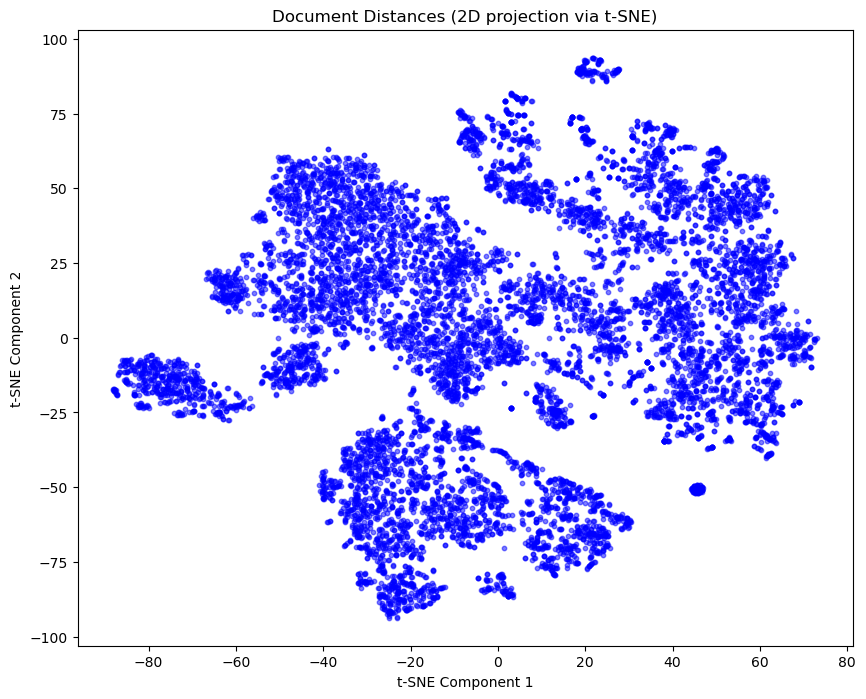

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def get_document_vector(tokens, model):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    if len(vectors) == 0:
        return np.zeros(model.vector_size) 
    return np.mean(vectors, axis=0)


document_vectors = np.array([get_document_vector(preprocess(reuters.raw(fileid)), model) for fileid in reuters.fileids()])

tsne = TSNE(n_components=2, random_state=42)
document_2d = tsne.fit_transform(document_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(document_2d[:, 0], document_2d[:, 1], s=10, c='blue', alpha=0.5)
plt.title("Document Distances (2D projection via t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [14]:
import gensim.downloader as api
from gensim.models import Word2Vec
import io


model_word2vec = Word2Vec.load("word2vec_reuters.model")
glove_vectors = api.load('glove-wiki-gigaword-50')

word_pairs = [
    ('king', 'queen'),
    ('man', 'woman'),
    ('car', 'automobile'),
    ('cat', 'dog'),
    ('tree', 'plant')
]

print("Word2Vec similarities:")
for w1, w2 in word_pairs:
    if w1 in model_word2vec.wv and w2 in model_word2vec.wv:
        sim = model_word2vec.wv.similarity(w1, w2)
        print(f"{w1} - {w2}: {sim:.4f}")
    else:
        print(f"{w1} - {w2}: One or both words not in vocabulary.")

print("\nGloVe similarities:")
for w1, w2 in word_pairs:
    if w1 in glove_vectors and w2 in glove_vectors:
        sim = glove_vectors.similarity(w1, w2)
        print(f"{w1} - {w2}: {sim:.4f}")
    else:
        print(f"{w1} - {w2}: One or both words not in vocabulary.")


Word2Vec similarities:
king - queen: 0.8110
man - woman: 0.6949
car - automobile: 0.7305
cat - dog: 0.6860
tree - plant: 0.5179

GloVe similarities:
king - queen: 0.7839
man - woman: 0.8860
car - automobile: 0.6956
cat - dog: 0.9218
tree - plant: 0.5362
